In [2]:
import tensorflow as tf

#Load in the MNIST data
#Split it up into the training and testing batches

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

8


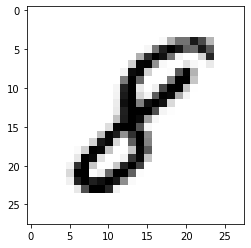

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#Select any number up to 60000
image_index = 7777
#The label to the X value
print(y_train[image_index])
#Use plt to show the image
plt.imshow(X_train[image_index], cmap="Greys")

In [5]:
#Know the shape of the dataset to channel it to the CNN
print(X_train.shape)
#The 60000 represents the number of images
#The 28s represent the dimensions of the images
X_train[0].shape

(60000, 28, 28)


(28, 28)

In [271]:
#Reshape the data so it can work with the Keras API
#The data needs to be in 4 dimensions
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#Make sure that the values are floats to decimal points after doing division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Normalizing the RGB codes by dividing it to the max RGB value
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in X_train:', X_train.shape[0])
print('Number of images in X_test:', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train: 60000
Number of images in X_test: 10000


In [272]:
#Import the necessary modules to build the Convolutional Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#Creating a sequential model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Flattening the 2D arrays for fully connected layers
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [273]:
#Compiling and fitting the model
model.compile(optimizer='adam',#The adam optimizer is typically used, as it usually deos the best
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_test, y_test, epochs=10)

Epoch 1/10
10000/10000 [==============================] - 5s 529us/step - loss: 0.4173 - accuracy: 0.8758
Epoch 2/10
10000/10000 [==============================] - 5s 512us/step - loss: 0.1684 - accuracy: 0.9460
Epoch 3/10
10000/10000 [==============================] - 5s 518us/step - loss: 0.1010 - accuracy: 0.9682
Epoch 4/10
10000/10000 [==============================] - 5s 511us/step - loss: 0.0640 - accuracy: 0.9799
Epoch 5/10
10000/10000 [==============================] - 5s 520us/step - loss: 0.0473 - accuracy: 0.9851
Epoch 6/10
10000/10000 [==============================] - 5s 526us/step - loss: 0.0360 - accuracy: 0.9880
Epoch 7/10
10000/10000 [==============================] - 5s 536us/step - loss: 0.0274 - accuracy: 0.9909
Epoch 8/10
10000/10000 [==============================] - 5s 527us/step - loss: 0.0190 - accuracy: 0.9942
Epoch 9/10
10000/10000 [==============================] - 5s 544us/step - loss: 0.0226 - accuracy: 0.9933
Epoch 10/10
10000/10000 [=====================

In [274]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 144us/step


[0.003394177638592373, 0.9998000264167786]

9


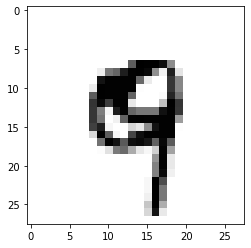

In [275]:
#Make an individual prediction for a future input
image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28), cmap="Greys")
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [299]:
import random
def makePrediction():
    img_idx = random.randint(0, 9999)
    plt.imshow(X_test[img_idx].reshape(28, 28), cmap="Greys")
    pred = model.predict(X_test[img_idx].reshape(1, 28, 28, 1))
    print("Image number", img_idx + 1)
    print("The number should be", pred.argmax())

Image number 4727
The number should be 8


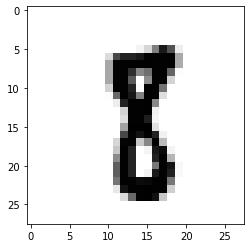

In [327]:
makePrediction()

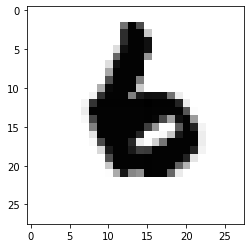

In [4]:
plt.imshow(X_test[7020], cmap="Greys")